In [2]:
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/data')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/rl2')
import torch
from model import RL2, MetaLearner
import torch.nn.utils.rnn as rnn_utils
import numpy as np

In [38]:
dat = pd.read_csv('../data/human/exp1.csv')
model = torch.load('../trained_models/env=claude_generated_tasks_paramsNA_dim3_data100_tasks1000_num_episodes100000_num_hidden=128_lr0.0003_run=0_test.pt')[1]
dat['shifted_category'] = np.concatenate((np.array([0.]), dat['category'].values[:-1]))
participants = dat.participant.unique()
conditions = dat.condition.unique()
performance = np.zeros((len(conditions), len(participants)))
input_list,target_list = [], []

for idx2, participant in enumerate(participants):
    
    for idx1, cond in enumerate(conditions):
        
        CONDITION = cond
        PARTICIPANT = participant
        inputs = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION][['feature1', 'feature2', 'feature3', 'shifted_category']].values
        targets = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION]['category'].values

        input_list.append(torch.from_numpy(inputs))
        target_list.extend(targets.astype(float))
        
# packed_inputs = rnn_utils.pad_sequence(inputs, batch_first=True)
# sequence_lengths = [len(x) for x in inputs]
# #print(sequence_lengths)
# with torch.no_grad():
#     model.eval()
#     model_choices = model(packed_inputs, sequence_lengths)
#     true_choices = targets.astype(float)
#     model_choices = model_choices.view(-1).float().round()
#     accuracy = (model_choices*true_choices).sum()/(model_choices.shape[0])
# performance[idx1, idx2] = accuracy
# #print(accuracy)

packed_inputs = rnn_utils.pad_sequence(input_list, batch_first=True)
sequence_lengths = [len(x) for x in input_list]

with torch.no_grad():
    model.eval()
    model_choices = model(packed_inputs, sequence_lengths)
    
model_choices = torch.concat([model_choices[i, :seq_len] for i, seq_len in enumerate(sequence_lengths)], axis=0).squeeze().float()
true_choices = torch.tensor(target_list).float()
accuracy = torch.eq(true_choices, model_choices).sum()/len(model_choices)
print(accuracy)

/tmp/ipykernel_5159/3724746607.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inputs = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION][['feature1', 'feature2', 'feature3', 'shifted_category']].values
/tmp/ipykernel_5159/3724746607.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  targets = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION]['category'].values


tensor(0.0832)


In [43]:
true_choices.shape

torch.Size([33440])

In [40]:
torch.eq(true_choices, model_choices).sum()

tensor(2781)

In [55]:
dat = pd.read_csv('../data/human/exp1.csv')
model = torch.load('../trained_models/env=claude_generated_tasks_paramsNA_dim3_data100_tasks1000_num_episodes100000_num_hidden=128_lr0.0003_run=0.pt')[1]
dat['shifted_category'] = np.concatenate((np.array([0.]), dat['category'].values[:-1]))
participants = dat.participant.unique()
conditions = dat.condition.unique()
performance = np.zeros((len(conditions), len(participants)))
per_trial_performance = np.ones((len(conditions), len(participants), 96))
inputs = []
for idx1, cond in enumerate(conditions):
    for idx2, participant in enumerate(participants):
        CONDITION = cond #4
        PARTICIPANT = participant #0
        inputs = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION][['feature1','feature2','feature3', 'shifted_category']].values #shifted_category
        targets = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION]['category'].values

        inputs = [torch.from_numpy(inputs)]
        packed_inputs = rnn_utils.pad_sequence(inputs, batch_first=True)
        sequence_lengths = [len(x) for x in inputs]

        with torch.no_grad():
            model.eval()
            model_choices = model(packed_inputs, sequence_lengths)
            true_choices = targets.astype(float)
            model_choices = model_choices.view(-1).float().round()
            #print(true_choices.shape, model_choices.shape)
            per_trial_performance[idx1, idx2, :sequence_lengths[0]] = torch.eq(torch.tensor(true_choices), model_choices)
            accuracy = torch.eq(torch.tensor(true_choices), model_choices).sum()/len(model_choices)
        performance[idx1, idx2] = accuracy

/tmp/ipykernel_5159/3541018217.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inputs = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION][['feature1','feature2','feature3', 'shifted_category']].values #shifted_category
/tmp/ipykernel_5159/3541018217.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  targets = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION]['category'].values


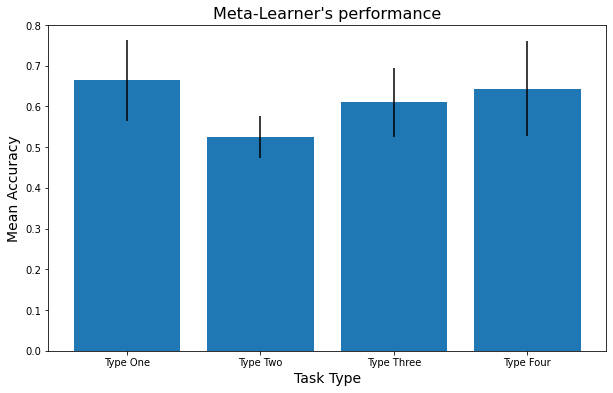

In [56]:
plt.figure(figsize=(10,6))
plt.bar(conditions,  performance.mean(1), yerr= performance.std(1), tick_label=["Type One", "Type Two", "Type Three", "Type Four"])
plt.title("Meta-Learner's performance", fontsize=16)
plt.xlabel("Task Type", fontsize=14)
plt.ylabel("Mean Accuracy", fontsize=14)
plt.show()

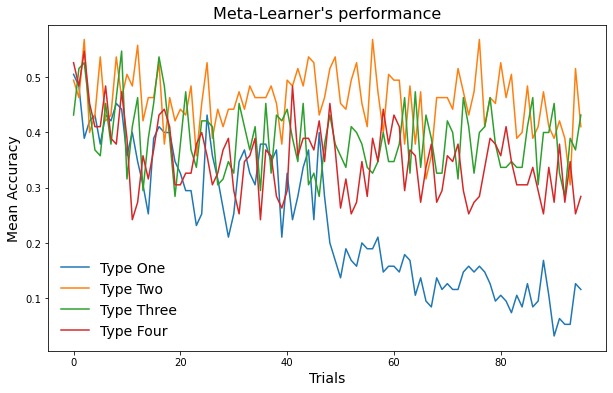

In [63]:
plt.figure(figsize=(10,6))
plt.plot(1-per_trial_performance.mean(1).T,  label=["Type One", "Type Two", "Type Three", "Type Four"])
plt.title("Meta-Learner's performance", fontsize=16)
plt.xlabel("Trials", fontsize=14)
plt.ylabel("Mean Accuracy", fontsize=14)
plt.legend(frameon=False, fontsize=14)
plt.show()

In [27]:
# Reload the dataset
data = pd.read_csv('Badham_Sanborn_Maylor_2017_aggregate_data.csv')

# Define columns
block_acc_columns = ["TYPEONE_BLK_ACC_1", "TYPEONE_BLK_ACC_2", "TYPEONE_BLK_ACC_3", 
                     "TYPEONE_BLK_ACC_4", "TYPEONE_BLK_ACC_5", "TYPEONE_BLK_ACC_6"]

block_acc_columns_type2 = ["TYPETWO_BLK_ACC_1", "TYPETWO_BLK_ACC_2", "TYPETWO_BLK_ACC_3", 
                           "TYPETWO_BLK_ACC_4", "TYPETWO_BLK_ACC_5", "TYPETWO_BLK_ACC_6"]

block_acc_columns_type3 = ["TYPETHREE_BLK_ACC_1", "TYPETHREE_BLK_ACC_2", "TYPETHREE_BLK_ACC_3", 
                           "TYPETHREE_BLK_ACC_4", "TYPETHREE_BLK_ACC_5", "TYPETHREE_BLK_ACC_6"]

block_acc_columns_type4 = ["TYPEFOUR_BLK_ACC_1", "TYPEFOUR_BLK_ACC_2", "TYPEFOUR_BLK_ACC_3", 
                           "TYPEFOUR_BLK_ACC_4", "TYPEFOUR_BLK_ACC_5", "TYPEFOUR_BLK_ACC_6"]

# Split the dataset into two groups based on the age
data_younger = data[data['AGE_Y1_O0']==1] #data[data["AGE"] <= 41]
data_older = data[data['AGE_Y1_O0']==0] #data[data["AGE"] > 41]

# Calculate the mean accuracy over participants for each block for all four types for the younger group
mean_accuracy_younger_type1 = data_younger[block_acc_columns].mean()
mean_accuracy_younger_type2 = data_younger[block_acc_columns_type2].mean()
mean_accuracy_younger_type3 = data_younger[block_acc_columns_type3].mean()
mean_accuracy_younger_type4 = data_younger[block_acc_columns_type4].mean()

# Calculate the mean accuracy over participants for each block for all four types for the older group
mean_accuracy_older_type1 = data_older[block_acc_columns].mean()
mean_accuracy_older_type2 = data_older[block_acc_columns_type2].mean()
mean_accuracy_older_type3 = data_older[block_acc_columns_type3].mean()
mean_accuracy_older_type4 = data_older[block_acc_columns_type4].mean()

# Calculate the mean difference in task performance between old and young groups for the four types
mean_difference_type1 = mean_accuracy_younger_type1.mean() - mean_accuracy_older_type1.mean()
mean_difference_type2 = mean_accuracy_younger_type2.mean() - mean_accuracy_older_type2.mean()
mean_difference_type3 = mean_accuracy_younger_type3.mean() - mean_accuracy_older_type3.mean()
mean_difference_type4 = mean_accuracy_younger_type4.mean() - mean_accuracy_older_type4.mean()

mean_differences = [mean_difference_type1, mean_difference_type2, mean_difference_type3, mean_difference_type4]

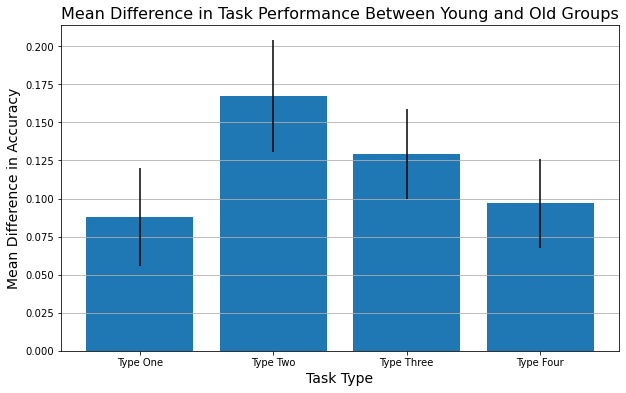

In [28]:
# Calculate the standard error of the mean accuracy for each block for all four types for the younger group
sem_accuracy_younger_type1 = data_younger[block_acc_columns].sem()
sem_accuracy_younger_type2 = data_younger[block_acc_columns_type2].sem()
sem_accuracy_younger_type3 = data_younger[block_acc_columns_type3].sem()
sem_accuracy_younger_type4 = data_younger[block_acc_columns_type4].sem()

# Calculate the standard error of the mean accuracy for each block for all four types for the older group
sem_accuracy_older_type1 = data_older[block_acc_columns].sem()
sem_accuracy_older_type2 = data_older[block_acc_columns_type2].sem()
sem_accuracy_older_type3 = data_older[block_acc_columns_type3].sem()
sem_accuracy_older_type4 = data_older[block_acc_columns_type4].sem()

# Calculate the standard error of the mean difference in task performance between old and young groups for the four types
sem_difference_type1 = ((sem_accuracy_younger_type1**2 + sem_accuracy_older_type1**2)**0.5).mean()
sem_difference_type2 = ((sem_accuracy_younger_type2**2 + sem_accuracy_older_type2**2)**0.5).mean()
sem_difference_type3 = ((sem_accuracy_younger_type3**2 + sem_accuracy_older_type3**2)**0.5).mean()
sem_difference_type4 = ((sem_accuracy_younger_type4**2 + sem_accuracy_older_type4**2)**0.5).mean()

sem_differences = [sem_difference_type1, sem_difference_type2, sem_difference_type3, sem_difference_type4]

# Create bar plot with error bars
plt.figure(figsize=(10,6))
plt.bar(range(1,5), mean_differences, yerr=sem_differences, tick_label=["Type One", "Type Two", "Type Three", "Type Four"])
plt.title("Mean Difference in Task Performance Between Young and Old Groups", fontsize=16)
plt.xlabel("Task Type", fontsize=14)
plt.ylabel("Mean Difference in Accuracy", fontsize=14)
plt.grid(axis='y')
plt.show()

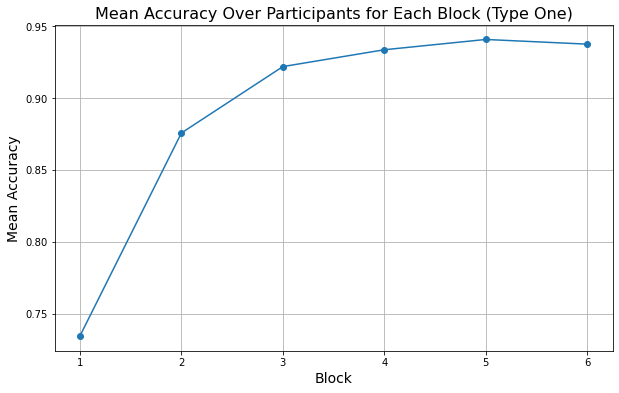

In [29]:
# Extract the columns related to the mean accuracy over the 6 blocks for Type One
block_acc_columns = ["TYPEONE_BLK_ACC_1", "TYPEONE_BLK_ACC_2", "TYPEONE_BLK_ACC_3", 
                     "TYPEONE_BLK_ACC_4", "TYPEONE_BLK_ACC_5", "TYPEONE_BLK_ACC_6"]

# Calculate the mean accuracy over participants for each block
mean_accuracy = data[block_acc_columns].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1,7), mean_accuracy, marker='o')
plt.title("Mean Accuracy Over Participants for Each Block (Type One)", fontsize=16)
plt.xlabel("Block", fontsize=14)
plt.ylabel("Mean Accuracy", fontsize=14)
plt.grid(True)
plt.xticks(range(1,7))
plt.show()

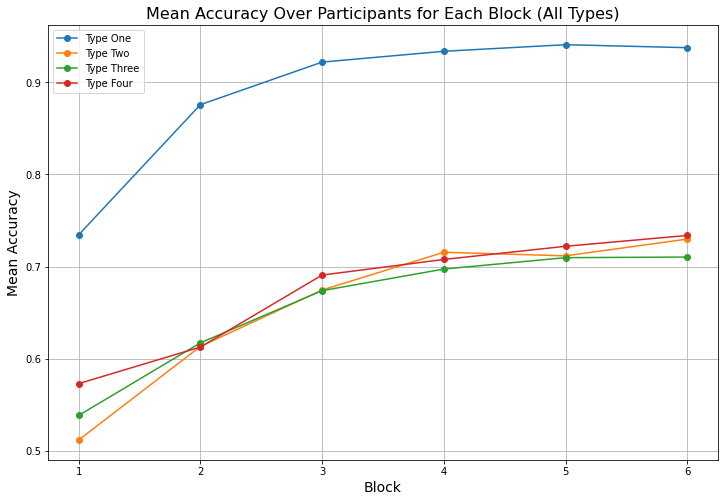

In [23]:
# Extract the columns related to the mean accuracy over the 6 blocks for all four types
block_acc_columns_type2 = ["TYPETWO_BLK_ACC_1", "TYPETWO_BLK_ACC_2", "TYPETWO_BLK_ACC_3", 
                           "TYPETWO_BLK_ACC_4", "TYPETWO_BLK_ACC_5", "TYPETWO_BLK_ACC_6"]

block_acc_columns_type3 = ["TYPETHREE_BLK_ACC_1", "TYPETHREE_BLK_ACC_2", "TYPETHREE_BLK_ACC_3", 
                           "TYPETHREE_BLK_ACC_4", "TYPETHREE_BLK_ACC_5", "TYPETHREE_BLK_ACC_6"]

block_acc_columns_type4 = ["TYPEFOUR_BLK_ACC_1", "TYPEFOUR_BLK_ACC_2", "TYPEFOUR_BLK_ACC_3", 
                           "TYPEFOUR_BLK_ACC_4", "TYPEFOUR_BLK_ACC_5", "TYPEFOUR_BLK_ACC_6"]

# Calculate the mean accuracy over participants for each block for all four types
mean_accuracy_type2 = data[block_acc_columns_type2].mean()
mean_accuracy_type3 = data[block_acc_columns_type3].mean()
mean_accuracy_type4 = data[block_acc_columns_type4].mean()

# Plot
plt.figure(figsize=(12,8))
plt.plot(range(1,7), mean_accuracy, marker='o', label="Type One")
plt.plot(range(1,7), mean_accuracy_type2, marker='o', label="Type Two")
plt.plot(range(1,7), mean_accuracy_type3, marker='o', label="Type Three")
plt.plot(range(1,7), mean_accuracy_type4, marker='o', label="Type Four")
plt.title("Mean Accuracy Over Participants for Each Block (All Types)", fontsize=16)
plt.xlabel("Block", fontsize=14)
plt.ylabel("Mean Accuracy", fontsize=14)
plt.grid(True)
plt.xticks(range(1,7))
plt.legend()
plt.show()

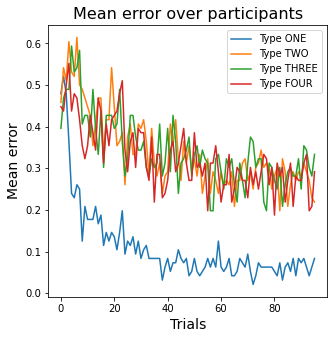

In [59]:
TYPES = ['ONE', 'TWO', 'THREE', 'FOUR']
NUM_TRIALS = 96
types_acc = [[f'TYPE{TYPE}_ACC_{idx}' for idx in range(1, NUM_TRIALS+1)] for TYPE in TYPES]

plt.figure(figsize=(5,5))
for type_name, type_acc in zip(TYPES, types_acc):
    plt.plot(np.arange(NUM_TRIALS), 1-data[type_acc].mean(), label=f'Type {type_name}')
plt.title("Mean error over participants", fontsize=16)
plt.xlabel("Trials", fontsize=14)
plt.ylabel("Mean error", fontsize=14)
plt.legend()
plt.show()